In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("framingham.csv").dropna()
df_x = df.drop(columns=["TenYearCHD"])
df_y_binary = df["TenYearCHD"]
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y_binary, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.8360655737704918, Precision: 0.5555555555555556, Recall: 0.08196721311475409, F1: 0.14285714285714285


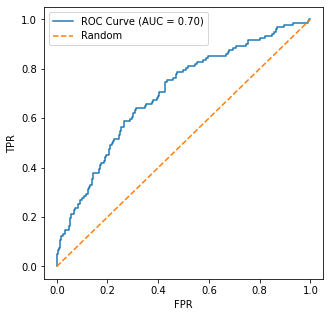

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
axs.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
axs.plot([0, 1], [0, 1], linestyle="--", label="Random")
axs.set_xlabel("FPR")
axs.set_ylabel("TPR")
axs.legend()
plt.show()


In [10]:
print(f"Percent of values in each class for y_test\n{y_test.value_counts(normalize=True)}")

print(f"Percent of values in each class for y_pred\n{pd.Series(y_pred).value_counts(normalize=True)}")

print(f"Percent of values in each class for y_train\n{y_train.value_counts(normalize=True)}")


Percent of values in each class for y_test
0    0.515695
1    0.484305
Name: TenYearCHD, dtype: float64
Percent of values in each class for y_pred
0    0.556054
1    0.443946
dtype: float64
Percent of values in each class for y_train
1    0.503928
0    0.496072
Name: TenYearCHD, dtype: float64


In [7]:
df = pd.read_csv("framingham.csv").dropna()

##################################################
# Sample same number of positive and negative samples
##################################################
df_negative = df[df["TenYearCHD"] == 0]
df_positive = df[df["TenYearCHD"] == 1]
df_negative = df_negative.sample(len(df_positive), random_state=42)
df = pd.concat([df_negative, df_positive])

df_x = df.drop(columns=["TenYearCHD"])
df_y_binary = df["TenYearCHD"]
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
994,0,46,2.0,0,0.0,0.0,0,0,0,270.0,122.0,76.0,21.35,77.0,88.0,0
4038,0,39,3.0,0,0.0,0.0,0,0,0,181.0,103.0,62.0,20.68,70.0,69.0,0
2477,1,39,1.0,1,20.0,0.0,0,0,0,232.0,122.5,78.5,26.11,80.0,73.0,0
2222,0,65,4.0,1,1.0,0.0,0,1,0,322.0,165.0,95.0,22.84,80.0,81.0,0
1623,1,46,1.0,1,5.0,0.0,0,0,0,221.0,125.0,88.0,24.81,72.0,87.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,50,1.0,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0,1
4223,1,56,4.0,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0,1
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y_binary, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.6636771300448431, Precision: 0.6666666666666666, Recall: 0.6111111111111112, F1: 0.6376811594202899


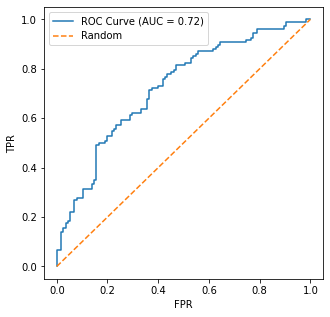

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
axs.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
axs.plot([0, 1], [0, 1], linestyle="--", label="Random")
axs.set_xlabel("FPR")
axs.set_ylabel("TPR")
axs.legend()
plt.show()
